# Distributions Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/clcx/Documents/GitHub/My-Python-Learning/Machine Learning/05-Seaborn/dm_office_sales.csv') 

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


## Rugplot

Very simple plot that puts down one mark per data point. This plot needs the single array passed in directly. We won't use it too much since its not very clarifying for large data sets.

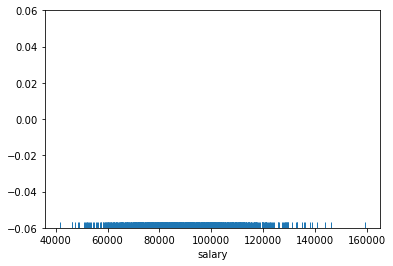

In [4]:
# biasa nya kita butuh value x dan y
# tapi karena rugplot ini y nya rataan, jadi ga penting karena ga ngaruh
# kita coba bikin plot buat salary
sns.rugplot(x='salary',data=df);

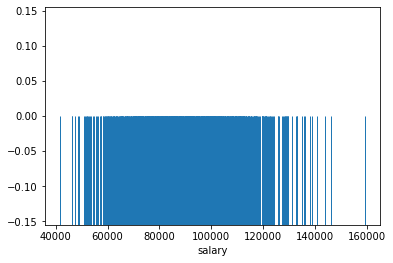

In [5]:
# karena teralu tipis kita gedein height nya sampe setengah axes nya
sns.rugplot(x='salary',data=df,height=0.5);

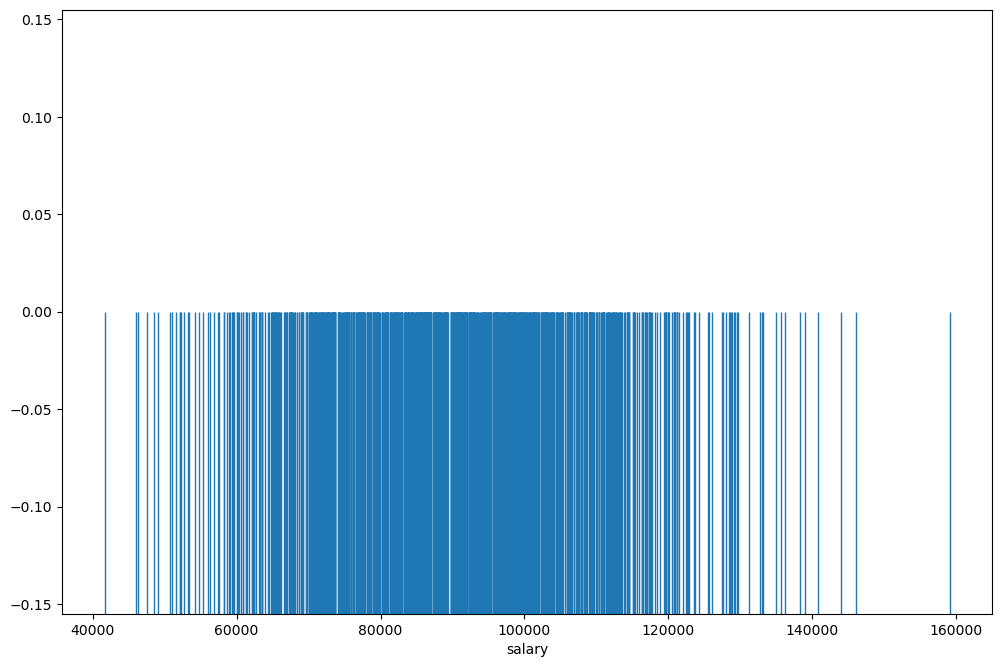

In [6]:
# inget kalo mau ngubah ukuran figure nya tinggal pake plt.figure
plt.figure(figsize=(12,8),dpi=100)
sns.rugplot(x='salary',data=df,height=0.5);

## displot() and histplot()  
The rugplot itself is not very informative for larger data sets distribution around the mean since so many ticks makes it hard to distinguish one tick from another. Instead we should count the number of tick marks per some segment of the x axis, then construct a histogram from this.

The displot is a plot type that can show you the distribution of a single feature. It is a histogram with the option of adding a "KDE" plot (Kernel Density Estimation) on top of the histogram. Let's explore its use cases and syntax.

notes dulu, BINS. bins itu jumlah bar nya. jadi contoh ada data x nya itu 0,10,20,30 (bayangin) terus kita mau kelompokin jadi 3 bar (bins). nah berarti kan bin 1 itu 0-10, terus 10-20, 20-30. ya gitu deh. nanti di parameter bisa di set bins nya mau brp dari datasetnya.

jadi displot itu plot histogram yang kayak forex gitu lah, bar-bar(bins) gitu keatas.

kalo histplot itu kaya displot juga cuma lebih kurang fiturnya, jadi kebanyakan pasti bakalan pake displot aja.

PS: detailnya nonton video distribution plots part 1.

In [7]:
# jangan pake DISTPLOT!! DEPRECATED!!
sns.displot
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

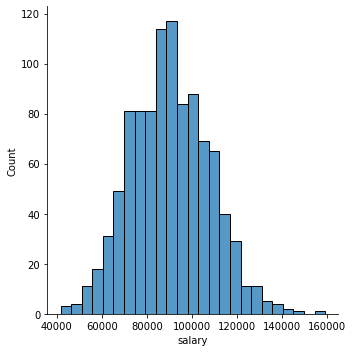

In [8]:
# skrg kita coba bikin displot
sns.displot(data=df,x='salary');

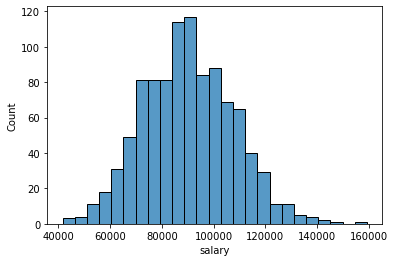

In [9]:
# kita coba bikin histplot buat bandingin, sama aja kok
sns.histplot(data=df,x='salary');

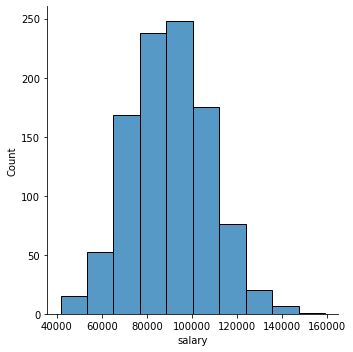

In [10]:
# kita coba bikin bins nya 10 aja
sns.displot(data=df,x='salary',bins=10);

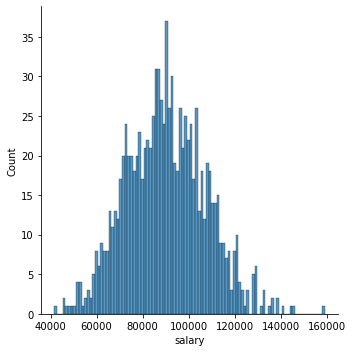

In [11]:
# bins nya 100 juga bisa
sns.displot(data=df,x='salary',bins=100)

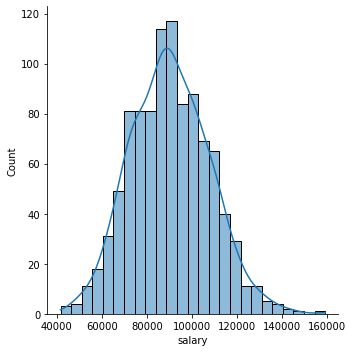

In [12]:
# kita bisa juga munculin KDE nya
sns.displot(data=df,x='salary',kde=True)

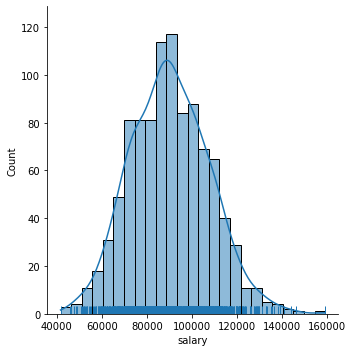

In [13]:
# bisa juga munculin rug nya
sns.displot(data=df,x='salary',kde=True,rug=True)

### Adding in a grid and styles

You can reset to a different default style: one of {darkgrid, whitegrid, dark, white, ticks}.

In a later notebook and lecture we will cover custom styling in a lot more detail.

### NOTES
#### Kalo kita set style itu keganti 1 notebook, jadi harus restart kernel nya baru bisa balik ke default lagi

<AxesSubplot:xlabel='salary', ylabel='Count'>

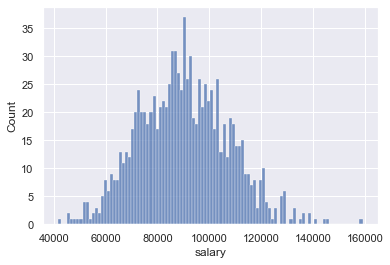

In [14]:
sns.set(style='darkgrid')
sns.histplot(data=df,x='salary',bins=100)

<AxesSubplot:xlabel='salary', ylabel='Count'>

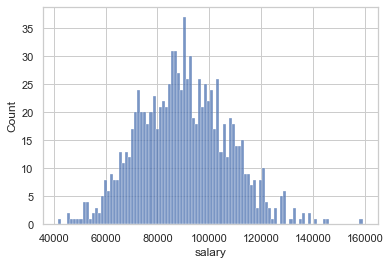

In [15]:
sns.set(style='whitegrid')
sns.histplot(data=df,x='salary',bins=100)

<AxesSubplot:xlabel='salary', ylabel='Count'>

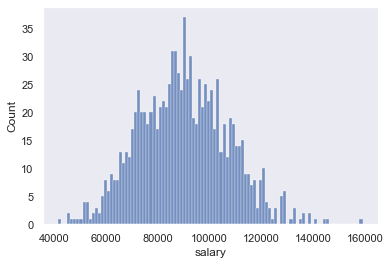

In [16]:
sns.set(style='dark')
sns.histplot(data=df,x='salary',bins=100)

<AxesSubplot:xlabel='salary', ylabel='Count'>

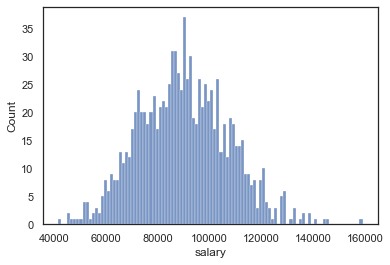

In [17]:
sns.set(style='white')
sns.histplot(data=df,x='salary',bins=100)

<AxesSubplot:xlabel='salary', ylabel='Count'>

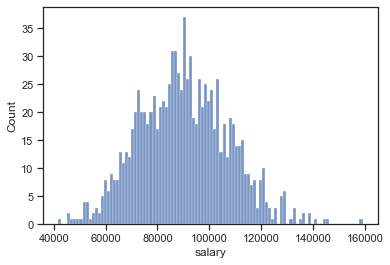

In [18]:
# munculin ticks di sumbu y nya
sns.set(style='ticks')
sns.histplot(data=df,x='salary',bins=100)

### Adding in keywords from matplotlib

Seaborn plots can accept keyword arguments directly from the matplotlib code that seaborn uses. Keep in mind, not every seaborn plot can accept all matplotlib arguments, but the main styling parameters we've discussed are available. 

jadi semua parameter yang udah kita pelajarin di matplotlib bakalan bisa dipake lagi di sini. kalo kita arahin cursor ke displot, bakalan ada banyak parameter. di terakhir ada kwargs** itu maksudnya parameters di matplotlib

In [19]:
#sns.displot

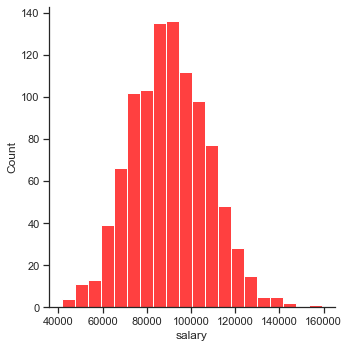

In [20]:
# kita bisa ganti warna barnya
sns.displot(data=df,x='salary',bins=20,color='red')

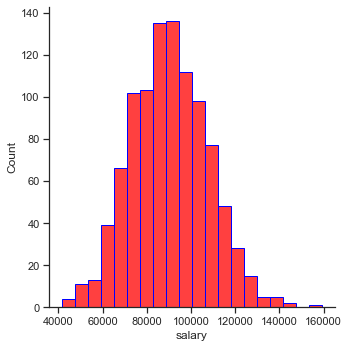

In [21]:
# ganti edge colornya jadi biru
sns.displot(data=df,x='salary',bins=20,color='red',edgecolor='blue')

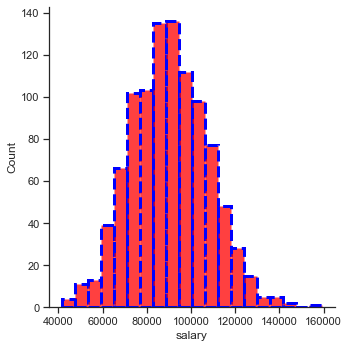

In [22]:
# bisa juga ganti linewidth sama linestyle buat edge nya
# walaupun biasa orang gabakal ganti
# cuma buat tunjukin aja
sns.displot(data=df,x='salary',bins=20,color='red',edgecolor='blue',linewidth=3,ls='--')

## The Kernel Density Estimation Plot

**Note: Review the video for full detailed explanation.**

The KDE plot maps an estimate of a probability *density* function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Let's build out a simple example:

In [23]:
# kita coba buat dataframe ages pake numpy

In [28]:
np.random.seed(42) # pake seed 42 biar sama kaya jose

# kita pake randint jadi bakalan ke uniformly distributed
# padahal kalo dataset asli dataset umur itu gabakalan uniform
sample_ages = np.random.randint(0,100,200) # 0-100, 200 angka

In [29]:
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [30]:
# jadiin dataframe
sample_ages = pd.DataFrame(sample_ages,columns=['age'])

In [31]:
sample_ages.head()

,age
0,51
1,92
2,14
3,71
4,60


<AxesSubplot:xlabel='age'>

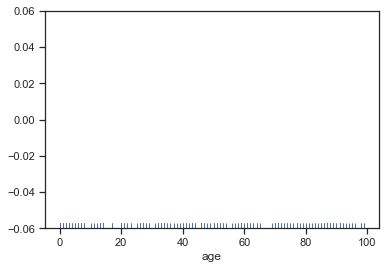

In [32]:
# coba bikin rugplot nya
sns.rugplot(data=sample_ages,x='age')

# bisa distributionnya lumayan uniform (merata)
# cuma ada sedikit gap di bagian deket 20 sama diatas 60

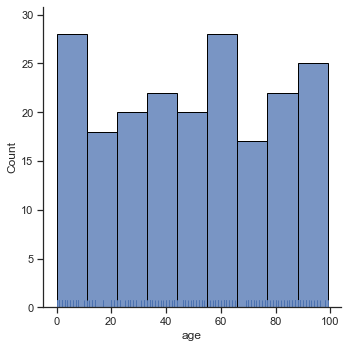

In [35]:
# kita buat displotnya
sns.displot(data=sample_ages,x='age',rug=True,edgecolor='black')

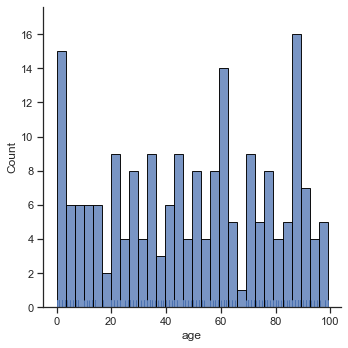

In [36]:
# buat liat hasil yg lebih variatif kita bisa tambahin gedein binsnya
sns.displot(data=sample_ages,x='age',rug=True,bins=30,edgecolor='black')

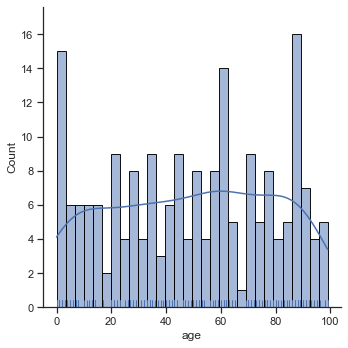

In [37]:
# skrg kita munculin KDE nya
sns.displot(data=sample_ages,x='age',rug=True,bins=30,kde=True,edgecolor='black')

<AxesSubplot:xlabel='age', ylabel='Density'>

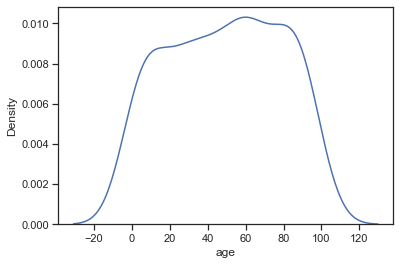

In [38]:
# terus bikin kdeplot dari data yg sama
sns.kdeplot(data=sample_ages,x='age')

# bisa kita liat bentuknya agak beda soalnya di kde nya itu valuenya sampe keluar
# < 0 sama > 100
# sedangkan di displotnya cuma 0-100

### Cut Off KDE

We could cut off the KDE if we know our data has hard limits (no one can be a negative age and no one in the population can be older than 100 for some reason)

<AxesSubplot:xlabel='age', ylabel='Density'>

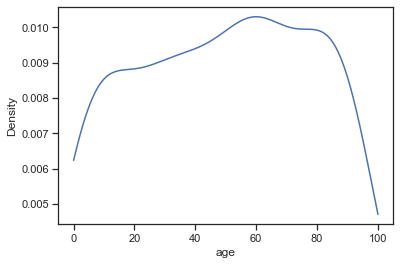

In [40]:
# jadi kita bisa batasin rangenya pake parameter clip
sns.kdeplot(data=sample_ages,x='age',clip=[0,100])

# bentuknya jadi kurang lebih sama kayak di displot
# agak beda soalnya y di displot itu count
# di kdeplotnya itu density

# density itu maksudnya persentase dari semuanya

### Bandwidth

As explained in the video, the KDE is constructed through the summation of the kernel (most commonly Gaussian), we can effect the bandwith of this kernel to make the KDE more "sensitive" to the data. Notice how with a smaller bandwith, the kernels don't stretch so wide, meaning we don't need the cut-off anymore. This is analagous to increasing the number of bins in a histogram (making the actual bins narrower).

In [ ]:
# pake parameter bw_adjust

In [41]:
# semakin kecil bandwidth nya, semakin gede noisenya alias semakin bergelombang
# semakin gede semakin curvy rata

<AxesSubplot:xlabel='age', ylabel='Density'>

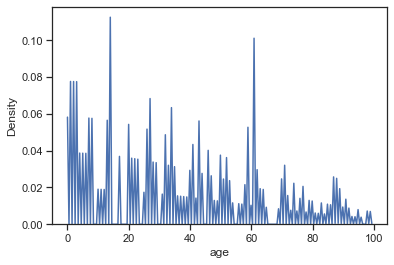

In [43]:
# coba pake bandwidth kecil bgt
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.01)

<AxesSubplot:xlabel='age', ylabel='Density'>

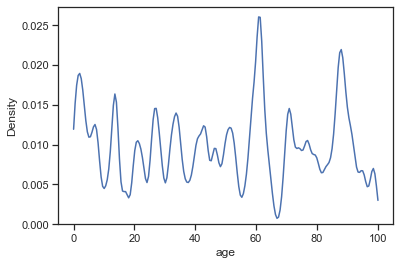

In [44]:
# naikin dikit
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.1)

<AxesSubplot:xlabel='age', ylabel='Density'>

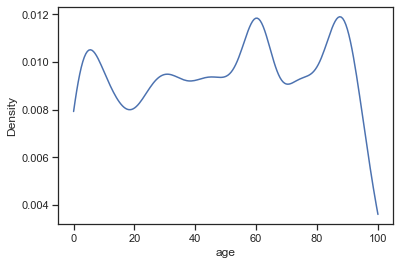

In [45]:
# naikin lagi
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.5)

<AxesSubplot:xlabel='age', ylabel='Density'>

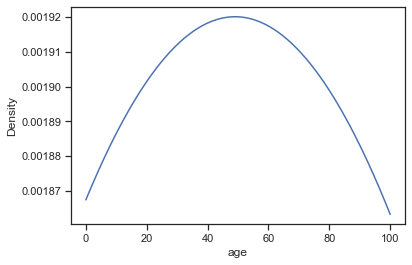

In [47]:
# coba tinggi banget
# ini terlalu rata dan ga ada signal sama sekali jadi ini buat kasih liat aja
# jadi harus di adjust sampe reasonable
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=20)

### Basic Styling

There are a few basic styling calls directly availble in a KDE.

In [48]:
# shade sama color

# shade buat kasih warna didalem plotnya
# color buat ganti warnanya

JADI INI 3 PARAMETER YANG BAKALAN SERING DIPAKE

CLIP, BW_ADJUST, SHADE

<AxesSubplot:xlabel='age', ylabel='Density'>

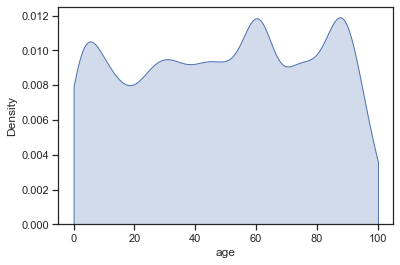

In [50]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.5,shade=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

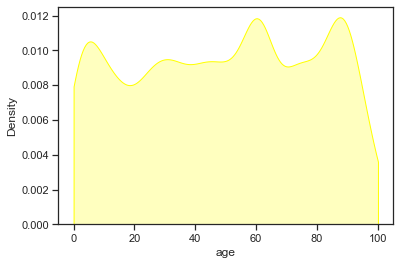

In [51]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.5,shade=True,color='yellow')

<AxesSubplot:xlabel='age', ylabel='Density'>

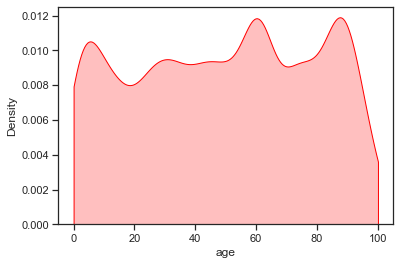

In [52]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.5,shade=True,color='red')

<AxesSubplot:xlabel='age', ylabel='Density'>

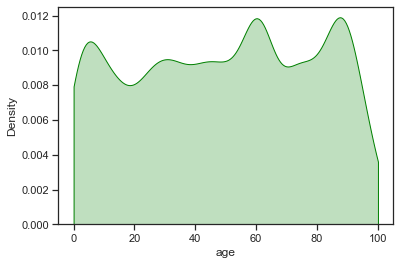

In [53]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.5,shade=True,color='green')